In [1]:
# Import the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and view the data
data = pd.read_csv('unemployment_quartely_2004-22_clean.csv')
data.head()

,Territory_ID,Territory,Territory_acr,Gender_ID,Gender,ages from,ages to,Year,Quarter,Unemployment rate
0,1,Italy,IT,1,males,15,24,2004.0,Total,20.664027
1,1,Italy,IT,1,males,15,24,2004.0,2.0,21.089639
2,1,Italy,IT,1,males,15,24,2004.0,1.0,20.361498
3,1,Italy,IT,1,males,15,24,2004.0,4.0,22.135774
4,1,Italy,IT,1,males,15,24,2004.0,3.0,19.101695


In [3]:
data.shape

(13680, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13680 entries, 0 to 13679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territory_ID       13680 non-null  int64  
 1   Territory          13680 non-null  object 
 2   Territory_acr      13680 non-null  object 
 3   Gender_ID          13680 non-null  int64  
 4   Gender             13680 non-null  object 
 5   ages from          13680 non-null  int64  
 6   ages to            13680 non-null  int64  
 7   Year               13680 non-null  float64
 8   Quarter            13680 non-null  object 
 9   Unemployment rate  13680 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Territory_ID,13680.0,2.500000,1.707888,0.000000,1.000000,2.500000,4.000000,5.00000
Gender_ID,13680.0,4.000000,3.559156,1.000000,1.000000,2.000000,9.000000,9.00000
ages from,13680.0,23.750000,11.924676,15.000000,15.000000,17.500000,27.500000,50.00000
ages to,13680.0,52.125000,18.361210,24.000000,34.000000,56.500000,66.500000,74.00000
Year,13680.0,2013.000000,5.477426,2004.000000,2008.000000,2013.000000,2018.000000,2022.00000
Unemployment rate,13680.0,11.631883,9.186937,0.913676,5.488089,8.594897,14.653555,64.88562


## EDA

In [6]:
data.columns

Index(['Territory_ID', 'Territory', 'Territory_acr', 'Gender_ID', 'Gender',
       'ages from', 'ages to', 'Year', 'Quarter', 'Unemployment rate'],
      dtype='object')

In [7]:
data.Territory.value_counts()

Italy          2280
Nord           2280
Nord-ovest     2280
Nord-est       2280
Centro (I)     2280
Mezzogiorno    2280
Name: Territory, dtype: int64

In [8]:
check = data.groupby('Territory')['Unemployment rate'].mean()
check

Territory
Centro (I)     11.600770
Italy          12.789481
Mezzogiorno    20.903990
Nord            8.235117
Nord-est        7.433162
Nord-ovest      8.828776
Name: Unemployment rate, dtype: float64

In [9]:
# Presetting fig color and size
sns.set_palette('BuPu_r')
plt.rcParams['figure.figsize'] = [10, 7]

In [35]:
# Extracting total crime rate for each year
mask = data.query("Quarter == 'Total' & Gender == 'total' ")

[Text(0.5, 1.0, 'Unemployment rate (2004 - 2023)')]

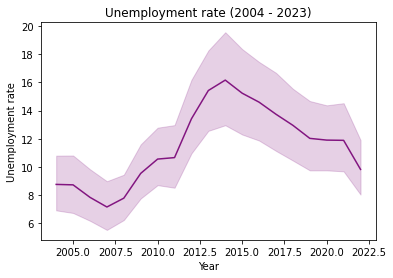

In [36]:
# Plotting time series of change in unemployment rate
sns.lineplot(data=mask, x='Year', y='Unemployment rate').set(title="Unemployment rate (2004 - 2023)")

Focusing on Gender

In [37]:
data['Gender'].value_counts()

males      4560
females    4560
total      4560
Name: Gender, dtype: int64

In [38]:
male = data.query(" Gender == 'males' ")
female = data.query(" Gender == 'females' ")

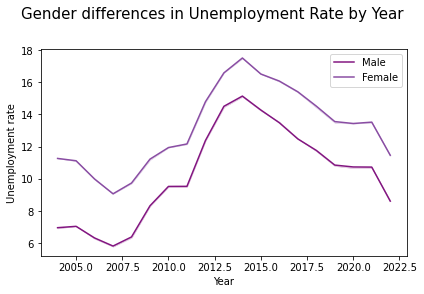

In [39]:
sns.lineplot(data=male, x='Year', y='Unemployment rate', ci=False, label='Male')
sns.lineplot(data=female, x='Year', y='Unemployment rate', ci=False, label='Female')
plt.suptitle("Gender differences in Unemployment Rate by Year", y=1.01, size=15)
plt.tight_layout()

Focusing on the regions

In [40]:
mask.pivot_table(values='Unemployment rate', index=['Territory', 'Year'], columns='Quarter')

Quarter               Total
Territory  Year            
Centro (I) 2004.0  8.534748
           2005.0  8.593758
           2006.0  8.142345
           2007.0  7.150701
           2008.0  7.963893
...                     ...
Nord-ovest 2018.0  9.713559
           2019.0  8.730108
           2020.0  8.640985
           2021.0  9.078113
           2022.0  7.426927

[114 rows x 1 columns]

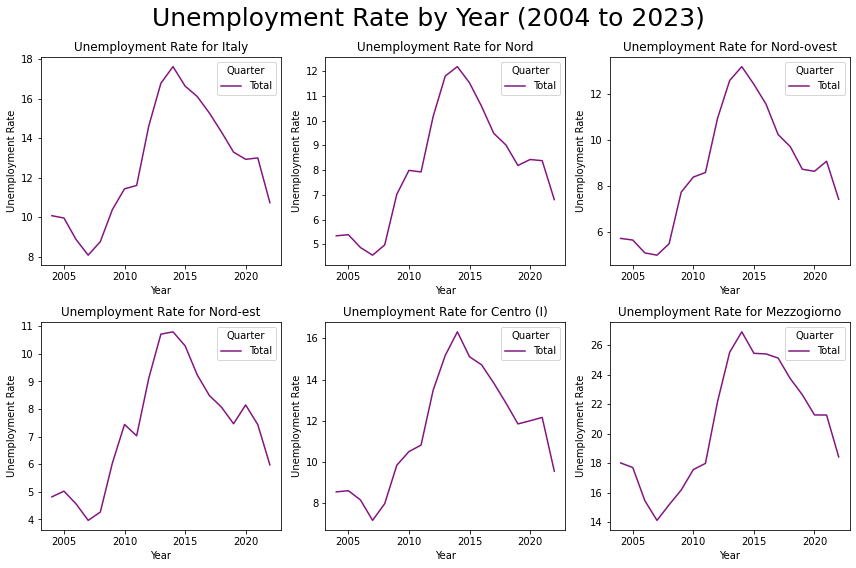

In [41]:
# Creating a lineplot of unemployment rate for each territory
territories = mask['Territory'].unique()
# There are 6 territories
fig, axes = plt.subplots(2,3, figsize=(12,8))

for i, territory in enumerate(territories):
    row = i // 3
    col = i % 3
    # Pivot the table on the Territories
    df = mask[mask['Territory'] == territory].pivot_table(values='Unemployment rate', index='Year', columns='Quarter')
    df.plot(kind='line', title=f'Unemployment Rate for {territory}', ax=axes[row][col])
    axes[row][col].set_xlabel('Year')
    axes[row][col].set_ylabel('Unemployment Rate')
    axes[row][col].legend(title='Quarter', loc='upper right')
    
plt.suptitle("Unemployment Rate by Year (2004 to 2023)", size=25)
plt.tight_layout()
plt.show()

How does this compare to number of crime per year?

In [42]:
path2 = "C:/Users/Ahmad/Desktop/Python/Omdena/omdena-lc-milan-covid-crime-rate/crime_type_by_year_cleaned.csv"
df2 = pd.read_csv(path2)
df2.head()

,Unnamed: 0,Territory_Code,Territory_Name,REATIPS_VICES,Crime_Type,Year,Number_of_Crime
0,0,IT,Italy,MASSMURD,mass murder,2017-01-01,17
1,1,IT,Italy,MASSMURD,mass murder,2018-01-01,20
2,2,IT,Italy,MASSMURD,mass murder,2019-01-01,14
3,3,IT,Italy,MASSMURD,mass murder,2020-01-01,29
4,4,IT,Italy,MASSMURD,mass murder,2021-01-01,29


In [43]:
df2["Year"] = pd.to_datetime(df2["Year"], format="%Y-%d-%m").dt.year

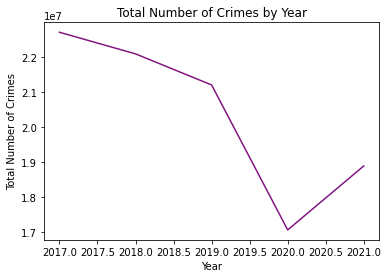

In [44]:
# Analyze the trend of total crimes over time
total_crime_yearly = df2.groupby("Year")["Number_of_Crime"].sum()
plt.plot(total_crime_yearly.index, total_crime_yearly.values)
plt.title("Total Number of Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Crimes")
plt.show()

In [45]:
mask.columns

Index(['Territory_ID', 'Territory', 'Territory_acr', 'Gender_ID', 'Gender',
       'ages from', 'ages to', 'Year', 'Quarter', 'Unemployment rate'],
      dtype='object')

In [46]:
new_years = mask[mask['Year'] >= 2017]
new_years.head()

,Territory_ID,Territory,Territory_acr,Gender_ID,Gender,ages from,ages to,Year,Quarter,Unemployment rate
255,1,Italy,IT,9,total,15,24,2017.0,Total,34.641499
260,1,Italy,IT,9,total,15,24,2018.0,Total,32.208376
265,1,Italy,IT,9,total,15,24,2019.0,Total,29.158319
270,1,Italy,IT,9,total,15,24,2020.0,Total,29.806888
275,1,Italy,IT,9,total,15,24,2021.0,Total,29.676103


Text(0.5, 0.98, 'Unemployment rate and Number of Crime (2017 to 2021)')

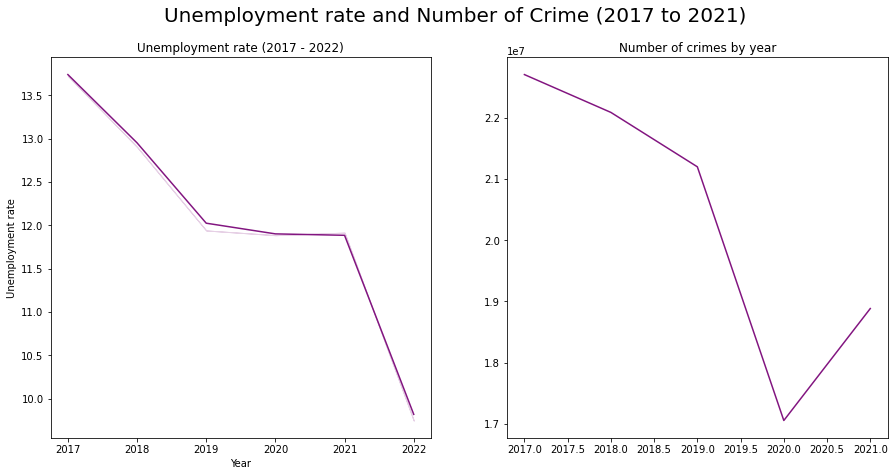

In [47]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.lineplot(data=new_years, x='Year', y='Unemployment rate', ci=False, ax=axes[0]).set(title="Unemployment rate (2017 - 2022)")
plt.plot(total_crime_yearly.index, total_crime_yearly.values)
plt.title("Number of crimes by year")
plt.suptitle("Unemployment rate and Number of Crime (2017 to 2021)", size=20)

In [48]:
df2.Territory_Name.value_counts()

Valle d'Aosta / Vallée d'Aoste    552
Italy                             276
Isernia                           276
L'Aquila                          276
Teramo                            276
                                 ... 
Treviso                           276
Belluno                           276
Vicenza                           276
Verona                            276
Barletta-Andria-Trani             276
Name: Territory_Name, Length: 133, dtype: int64

In [52]:
pc = [2017, 2018]
cv = [2019, 2020]
pcv = [2021, 2022]

precovid = mask[mask['Year'].isin(pc)]
covid = mask[mask['Year'].isin(cv)]
postcovid = mask[mask['Year'].isin(pcv)]
postcovid.head()

,Territory_ID,Territory,Territory_acr,Gender_ID,Gender,ages from,ages to,Year,Quarter,Unemployment rate
275,1,Italy,IT,9,total,15,24,2021.0,Total,29.676103
276,1,Italy,IT,9,total,15,24,2022.0,Total,23.703012
560,3,Nord,ITCD,9,total,15,24,2021.0,Total,21.103084
561,3,Nord,ITCD,9,total,15,24,2022.0,Total,16.359273
845,5,Nord-ovest,ITC,9,total,15,24,2021.0,Total,22.615521


In [55]:
print(f"Unemployement rate 2 years before COVID: {round(precovid['Unemployment rate'].mean(), 2)} %")
print(f"Unemployement rate during COVID: {round(covid['Unemployment rate'].mean(), 2)} %")
print(f"Unemployement rate 2 after before COVID: {round(postcovid['Unemployment rate'].mean() ,2)} %")

Unemployement rate 2 years before COVID: 13.35 %
Unemployement rate during COVID: 11.96 %
Unemployement rate 2 after before COVID: 10.85 %


It is evident that unemployment rate was on a down trend across all regions before slowing down a bit in 2019. The average unemployemnt rate before 2019 was 13.35 % compared to the 11.96 % during covid 19. The rate continued to drop till 2023.

The unemployment rate is higer for females compared to male, but it followed the general trend.

There are some minute variations in the employment rate across the different regions/territories, but the general downtrend from around 2013 is still visible across board.

The effect of COVID-19 on Unemployment rate, thus, was just a slight reduction in the downtrend, unemployment only slightly increased in regions like Nord, Nordovest and Nord est and Centro, but quickly reverted with to the original downtrend by 2021.